## Cosmology - Problem Sheet 1
### Drishika Nadella 

In [1]:
# Importing the relevant libraries 

import numpy as np
import matplotlib.pyplot as plt
import h5py
import illustris_python as il
import matplotlib as mpl
from scipy.stats import binned_statistic_2d

#### 1.1

In [2]:
# Define a base path
basePath = "/home/tnguser/sims.TNG/TNG50-4-Dark/output/"

In [3]:
nchunks = 4    # Number of chunks
snap = 99      # Snapshot corresponding to redshift z=0
z = 0          # Redshift

# Loading the headers from the groups data
with h5py.File(basePath+'/groups_%03d/fof_subhalo_tab_%03d.%s.hdf5'%(snap,snap,0),'r') as f:
    
    header=(f['Header'])
    print(header.attrs.keys(),"\n")
    
    for key in header.attrs.keys():
        print(key,header.attrs[key])
        
        # Save the value of the Hubble parameter from the header
        if key=='HubbleParam':
            h = header.attrs[key]

# Printing the Hubble Parameter
print("Hubble Parameter: ", h)

# Loading group mass (mass of each halo) and group position (x,y,z positions of each halo) of all chunks
fields = ['GroupMass','GroupPos']
data = {field: [] for field in fields}

for num in range(0, nchunks):       
    
    with h5py.File(basePath+'/groups_%03d/fof_subhalo_tab_%03d.%s.hdf5'%(snap,snap,num),'r') as f:
        for field in fields:           
            data[field].extend(np.array(f['Group'][field][:]))

<KeysViewHDF5 ['BoxSize', 'FlagDoubleprecision', 'Git_commit', 'Git_date', 'HubbleParam', 'Ngroups_ThisFile', 'Ngroups_Total', 'Nids_ThisFile', 'Nids_Total', 'Nsubgroups_ThisFile', 'Nsubgroups_Total', 'NumFiles', 'Omega0', 'OmegaLambda', 'Redshift', 'Time']> 

BoxSize 35000.0
FlagDoubleprecision 0
Git_commit b'd203ec8b07c7e2bdda5f608aa0babea46d603699'
Git_date b'Thu Apr 7 14:14:27 2016 +0200'
HubbleParam 0.6774
Ngroups_ThisFile 9
Ngroups_Total 18824
Nids_ThisFile 2521353
Nids_Total 10095112
Nsubgroups_ThisFile 1355
Nsubgroups_Total 22963
NumFiles 4
Omega0 0.3089
OmegaLambda 0.6911
Redshift 2.220446049250313e-16
Time 0.9999999999999998
Hubble Parameter:  0.6774


In [4]:
pos = np.asarray(data['GroupPos'])
mass = np.asarray(data['GroupMass'])

The halo positions are given in terms of $\textrm{ckpc/h}$ where $\textrm{ckpc}$ is comoving kiloparsec and $\textrm{h}$ is the reduced Hubble parameter. To convert this into physical positions in units of $\textrm{Mpc}$, we multiply the comoving positions with the scale factor and divide by the reduced Hubble parameter as below:

$$ r_{phys} \textrm{ [Mpc] } = \frac{1}{1+z} \frac{r_{comov} \textrm{ [Mpc] }}{10^3 h}$$

where the scale factor $a$ is given as $a(t) = \frac{1}{1+z}$. 

The halo mass is given in terms of $10^{10} M_\odot / h$. To convert this into mass in units of $M_\odot$, we do the following:

$$ m_{phys} = \frac{m \times 10^{10} M_\odot}{h} $$

In [5]:
# Taking care of the units

# Converting position from ckpc/h into Mpc
phys_pos = 1. / (1. + z) * pos / 1e3 / h

# Converting mass to Msun
phys_mass = mass * 1e10 / h
print("Min mass: %.2e, Max mass: %.2e"% (phys_mass.min(), phys_mass.max()))

Min mass: 8.82e+09, Max mass: 2.38e+14


Plotting the halo map along the X-Y plane:

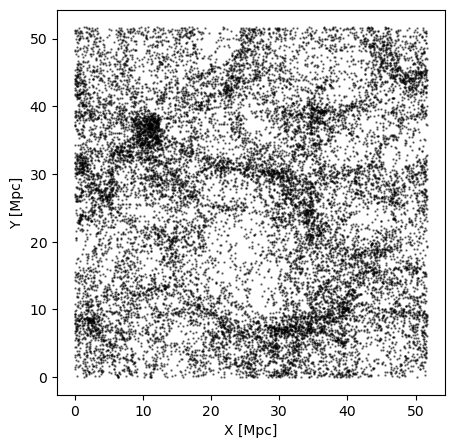

In [35]:
# 1.1 (a)

plt.figure(figsize=(5, 5))
plt.scatter(phys_pos[:, 0], phys_pos[:, 1], s = 0.5, color='black', alpha=0.5)
plt.xlabel("X [Mpc]")
plt.ylabel("Y [Mpc]")
plt.show()

We can see some structures in the above plot, with overdensities and filaments in some regions and voids in the others. 

Choosing the positions of the first 100 halos and plotting them as circles scaled by their mass:

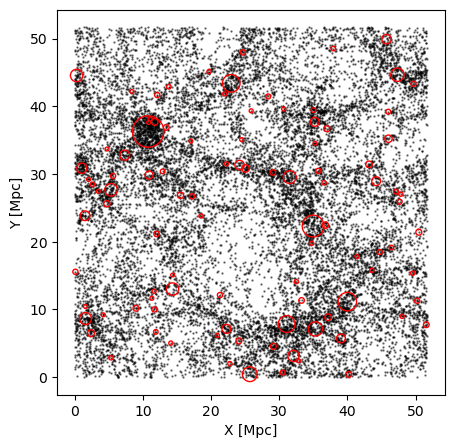

In [34]:
# 1.1 (b)

plt.figure(figsize=(5, 5))
plt.scatter(phys_pos[:, 0], phys_pos[:, 1], s = 0.5, color='black', alpha=0.5)
plt.scatter(phys_pos[:100, 0], phys_pos[:100, 1], s = mass[:100] / 10**1.5, edgecolors='red', facecolors = 'none')
plt.xlabel("X [Mpc]")
plt.ylabel("Y [Mpc]")
plt.show()

The overdensities are better seen in the above plot, where the most massive halos (at least within the first 100 halos) are present approximately at $\textrm{(12, 37) Mpc}$ on the $X-Y$ plane.

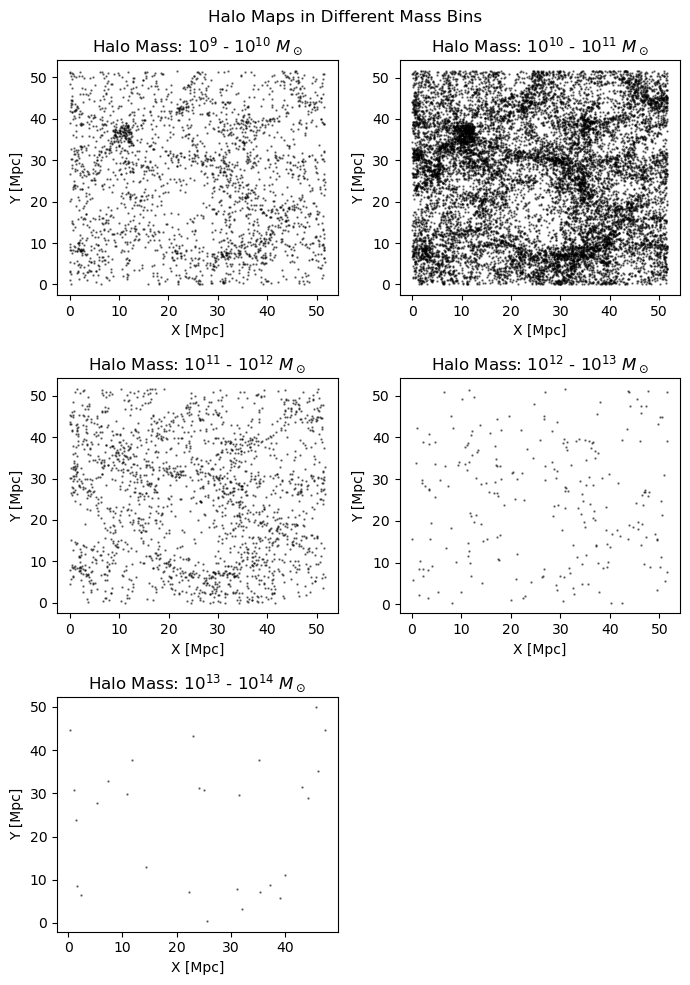

In [31]:
# 1.1 (c)

# Defining matplotlib figure
f = plt.figure(figsize=(7, 10))

# Get an array of the range of magnitudes of the physical masses
exps = np.unique(np.floor(np.log10(np.abs(phys_mass))).astype(int))    # This gives us the exponent values of the masses
bins = 10**exps                                                        # Raising it to the base of 10 gives us the mass bins

for i in range(len(bins)-1):
    
    # Get the positions within the given bins
    pos_bins = phys_pos[(phys_mass > bins[i]) & (phys_mass < bins[i+1])]
    
    # Plot the halo maps within the given mass bin
    ax = plt.subplot(3, 2, i + 1)
    ax.scatter(pos_bins[:, 0], pos_bins[:, 1], s = 0.5, color='black', alpha=0.5)
    ax.set_xlabel("X [Mpc]")
    ax.set_ylabel("Y [Mpc]")
    ax.set_title(fr"Halo Mass: $10^{{{exps[i]}}}$ - $10^{{{exps[i+1]}}}$ $M_\odot$")

# Plot formatting 
plt.suptitle("Halo Maps in Different Mass Bins")
plt.tight_layout()
plt.show()

We see that most of the halos are between $10^{10} - 10^{11} M_\odot$ mass. There are barely any halos between $10^{13} - 10^{14} M_\odot$ mass. 

#### 1.2

In [9]:
# 1.2 (a)

# Loading the particle coordinates within the halos
fields = ['Coordinates']
data2 = {field: [] for field in fields}

# Loading the particle coordinates of all the chunks
for num in range(0, nchunks):    # Number of file chunks   
    with h5py.File(basePath+'/snapdir_%03d/snap_%03d.%s.hdf5'%(snap,snap,num),'r') as f:
        for field in fields:           
            data2[field].extend(np.array(f['PartType1'][field][:]))

We have loaded the positions and can convert it into physical position as before. We obtain the particle mass from the background documentation (https://www.tng-project.org/data/docs/background/). The particle mass for the ```TNG50-4-Dark``` simulation is given as $1.9 \times 10^8 M_\odot \textrm{ / h}$. To convert it into the physical mass, we simply divide by the reduced Hubble parameter.

In [10]:
ppos = np.asarray(data2['Coordinates'])

# Converting position from ckpc/h into Mpc
phys_ppos = 1. / (1. + z) * ppos / 1e3 / h

# Convert mass to Msun
pmass = 1.9e8 / h        # Value from the background paper
print(ppos.shape)

(19683000, 3)


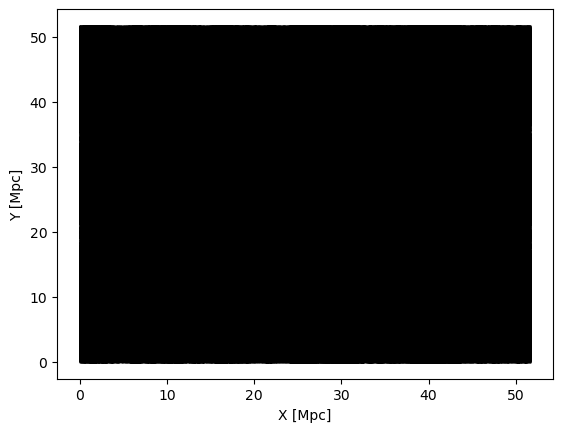

In [11]:
# 1.2 (a)

plt.scatter(phys_ppos[:, 0], phys_ppos[:, 1], s = 0.5, color='black', alpha=0.1)
plt.xlabel("X [Mpc]")
plt.ylabel("Y [Mpc]")
plt.show()

There are $19,683,000$ particles in total, all of which have been plotted here along the $X-Y$ plane. Due to the sheer number of particles, it is not practical to visualize all of them. Therefore, we visualize them with the help of 2D histograms.

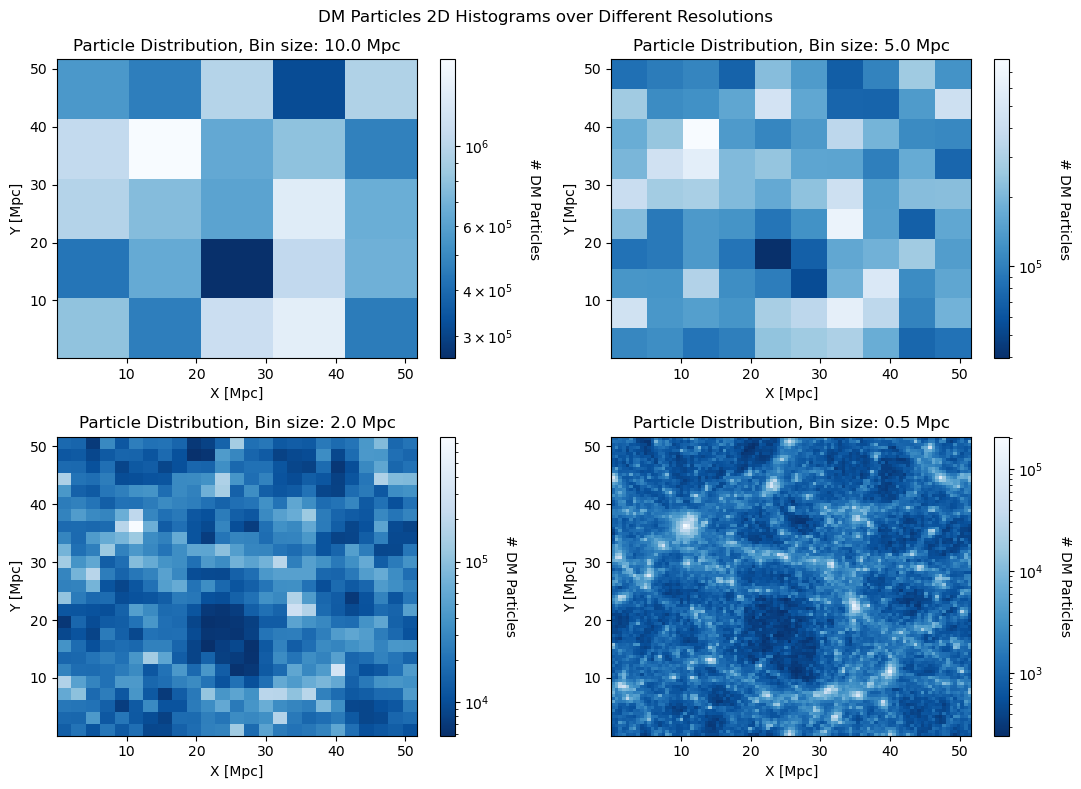

In [17]:
# 1.2 (b)

# Choosing different bin numbers and calculating corresponding pixel sizes 
hist_bins = np.array([5, 10, 25, 100])
pixs = 50. / hist_bins     # Mpc

# Defining matplotlib figure
f = plt.figure(figsize=(11,8))

for b in range(len(hist_bins)):
    
    # Plot the 2D histograms for a given size bin
    ax = plt.subplot(2, 2, b + 1)
    hist = ax.hist2d(phys_ppos[:, 0], phys_ppos[:, 1], bins = hist_bins[b], cmap=plt.cm.Blues_r, norm=mpl.colors.LogNorm())
    ax.set_xlabel("X [Mpc]")
    ax.set_ylabel("Y [Mpc]")
    ax.set_title("Particle Distribution, Bin size: %.1f Mpc"% (pixs[b]))
    clb = plt.colorbar(hist[3], ax=ax)
    clb.set_label('# DM Particles', labelpad=20, rotation=270)

# Plot formatting 
plt.suptitle("DM Particles 2D Histograms over Different Resolutions")
plt.tight_layout()
plt.show()

We can see that as the spatial resolution increases, we see the dark matter structure appear similar to the 2D halo maps constructed in Exercise 1. The histogram label indicates the number of DM particles $n$ in each bin of size $r \times r$. We can convert this into column density $\rho$ as:

$$ \rho = \frac{n \times m_{DM}}{r^2} $$

where $m_{DM}$ is the mass of each dark matter particle.

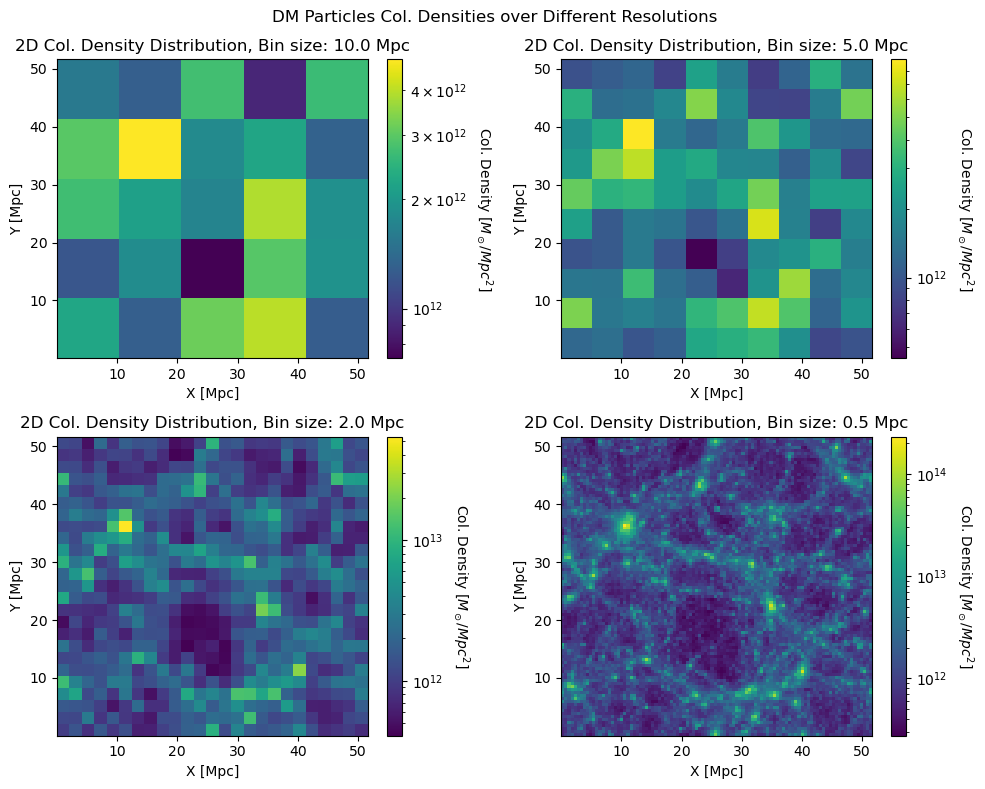

In [16]:
# 1.2 (c)

plt.figure(figsize=(10,8))

for b in range(len(hist_bins)):
    
    # Plot the 2D column densities for a given size bin
    ax = plt.subplot(2, 2, b + 1)
    hist = ax.hist2d(phys_ppos[:, 0], phys_ppos[:, 1], weights = np.tile(pmass / pixs[b]**2, len(phys_ppos[:, 0])), bins = hist_bins[b], norm=mpl.colors.LogNorm())
    ax.set_xlabel("X [Mpc]")
    ax.set_ylabel("Y [Mpc]")
    ax.set_title(f"2D Col. Density Distribution, Bin size: %.1f Mpc"% (pixs[b]))
    clb = plt.colorbar(hist[3], ax=ax)
    clb.set_label(r'Col. Density $[M_\odot / Mpc^2]$', labelpad=20, rotation=270)

# Plot formatting 
plt.suptitle("DM Particles Col. Densities over Different Resolutions")
plt.tight_layout()
plt.show()

Considering a bin size of 0.5 Mpc, we can clearly see the structured nature of the column density field, with some regions of overdensities / clumps, some regions with voids and many filamentary structures.

#### 2

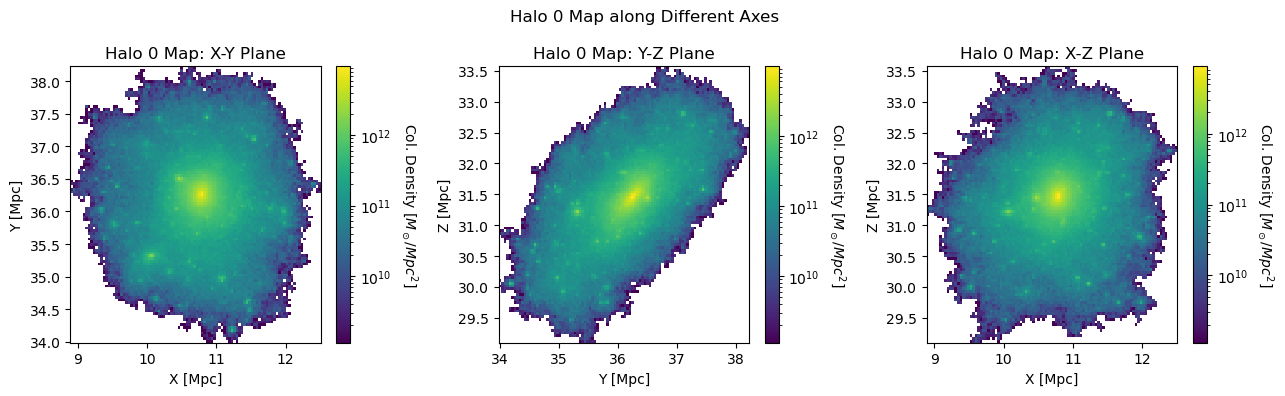

In [45]:
# 2.1 (a) and 2.1 (b)

parttype = 1
dm_fields = ['Coordinates']
haloID = [0]                       # 1st halo object
snap = 99                          # Redshift z=0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,4))
fig.suptitle('Halo 0 Map along Different Axes')
    
# Load the coordinates
Coordinates = il.snapshot.loadHalo(basePath, snap, haloID[0], parttype, fields=dm_fields)

# Convert them to physical coordinates
coords = 1. / (1. + z) * Coordinates / 1e3 / h

# Plot along X-Y plane
hist = ax1.hist2d(coords[:, 0], coords[:, 1], weights = np.tile(pmass / pixs[-1]**2, len(coords[:, 0])), bins = hist_bins[-1], norm=mpl.colors.LogNorm())
ax1.set_xlabel("X [Mpc]")
ax1.set_ylabel("Y [Mpc]")
ax1.set_title('Halo 0 Map: X-Y Plane')
clb = plt.colorbar(hist[3], ax=ax1)
clb.set_label(r'Col. Density $[M_\odot / Mpc^2]$', labelpad=20, rotation=270)

# Plot along Y-Z plane
hist = ax2.hist2d(coords[:, 1], coords[:, 2], weights = np.tile(pmass / pixs[-1]**2, len(coords[:, 0])), bins = hist_bins[-1], norm=mpl.colors.LogNorm())
ax2.set_xlabel("Y [Mpc]")
ax2.set_ylabel("Z [Mpc]")
ax2.set_title('Halo 0 Map: Y-Z Plane')
clb = plt.colorbar(hist[3], ax=ax2)
clb.set_label(r'Col. Density $[M_\odot / Mpc^2]$', labelpad=20, rotation=270)

# Plot along X-Z plane
hist = ax3.hist2d(coords[:, 0], coords[:, 2], weights = np.tile(pmass / pixs[-1]**2, len(coords[:, 0])), bins = hist_bins[-1], norm=mpl.colors.LogNorm())
ax3.set_xlabel("X [Mpc]")
ax3.set_ylabel("Z [Mpc]")
ax3.set_title('Halo 0 Map: X-Z Plane')
clb = plt.colorbar(hist[3], ax=ax3)
clb.set_label(r'Col. Density $[M_\odot / Mpc^2]$', labelpad=20, rotation=270)

plt.tight_layout()

We see that the halo has column densities between $10^{10} - 10^{12} \textrm{ } M_\odot / Mpc^2$. While along the X-Y and X-Z planes, the halo's density field looks roughly spherical, along the Y-Z plane it looks elongated. Its density field is not spherical along all directions.

Now we load dark matter halos of different masses. Based on the number of particles, the masses can vary widely.

In [47]:
haloID = [0, 300, 4546]

for i in range(len(haloID)):
    Coordinates = il.snapshot.loadHalo(basePath, snap, haloID[i], parttype, fields=dm_fields)     # Load the coordinates
    print(Coordinates[:, 0].shape)                                                                # Check the number of particles

(863872,)
(3197,)
(152,)


Since these halos have particles with several orders of magnitude difference between them, they can be considered as halos with widely varying masses.

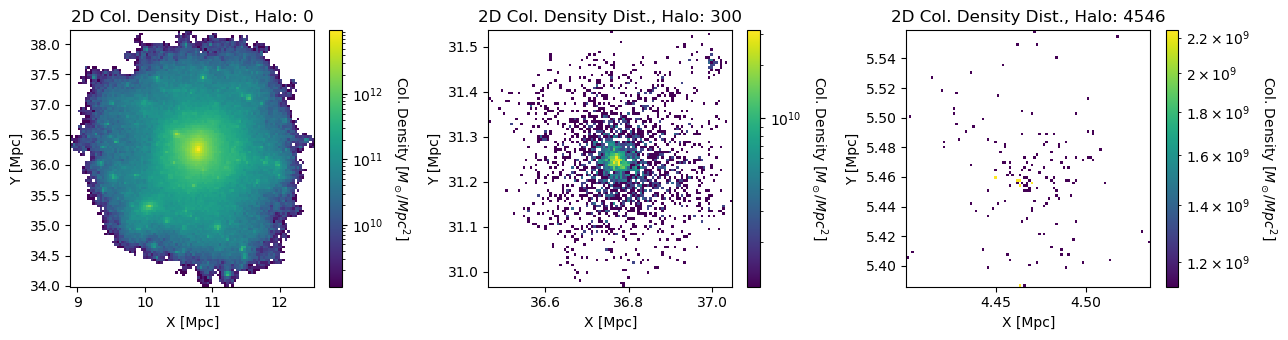

In [54]:
plt.figure(figsize=(13, 3.5))

for i in range(len(haloID)):
    
    Coordinates = il.snapshot.loadHalo(basePath, snap, haloID[i], parttype, fields=dm_fields)     # Load the coordinates
    coords = 1. / (1. + z) * Coordinates / 1e3 / h                                                # Convert them to physical coordinates
    
    # Plot
    ax = plt.subplot(1, 3, i + 1)
    hist = ax.hist2d(coords[:, 0], coords[:, 1], weights = np.tile(pmass / pixs[-1]**2, len(coords[:, 0])), bins = hist_bins[-1], norm=mpl.colors.LogNorm())
    ax.set_xlabel("X [Mpc]")
    ax.set_ylabel("Y [Mpc]")
    ax.set_title(f"2D Col. Density Dist., Halo: %d"% (haloID[i]))
    clb = plt.colorbar(hist[3], ax=ax)
    clb.set_label(r'Col. Density $[M_\odot / Mpc^2]$', labelpad=20, rotation=270)
    
plt.tight_layout()

Clearly, some halos like Halo 4546 have very few particles and therefore do not show a clear density distribution like Halo 0. 